<div>
<img src="figures/svtLogo.png"/>
</div>

<center><h1>Mathematical Optimization for Engineers</h1></center>
<center><h2>Lab 6 - The Simplex Method</h2></center>

Consider the following optimization problem:

$$\min_{x_1,x_2} \quad \quad x_1+x_2$$

$$\begin{aligned}
\mbox{s.t. }\quad 0 \; \leq \; x_1 \; &\leq \; 1\\
0 \; \leq \; x_2 \; &\leq \; 1\\
x_1+x_2 \; &\leq \; 1.5\\
\end{aligned}$$

<u>Task 1</u>: Sketch the feasible region for this problem. Where is the optimal solution?

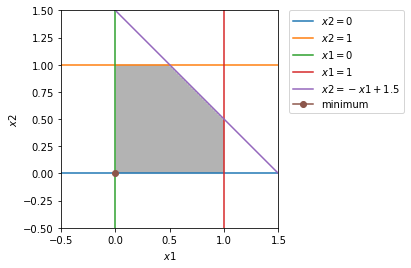

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-3,3,300)
x,y = np.meshgrid(d,d)
plt.imshow(((x>=0) & (y>=0) & (x<=1) & (y<=1) & (x+y<=1.5)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(-1, 2, 500)
y = np.linspace(-1, 2, 500)
# 0 <= x <= 1
y1 = 0
y2 = 1
# 0 <= y <= 1
x1 = 0
x2 = 1
# x + y <= 1.5
y5 = -x + 1.5

# Make plot
plt.plot(x, 0*np.ones_like(x), label=r'$x2=0$')
plt.plot(x, 1*np.ones_like(x), label=r'$x2=1$')
plt.plot(0*np.ones_like(y), y, label=r'$x1=0$')
plt.plot(1*np.ones_like(y), y, label=r'$x1=1$')
plt.plot(x, y5, label=r'$x2 = -x1 + 1.5$')
plt.plot(0, 0, '-o', label=r'minimum')
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')
plt.show()

<u>Task 2</u>: Introduce slack variables and reformulate the optimization problem into standard form:

$$\begin{aligned}
\min_{\bar{\mathbf x}} \quad \bar{\mathbf{d}}^{T} \bar{\mathbf x} \\
\mbox{s.t.} \quad \bar{\mathbf A} \bar{\mathbf x} &= \bar{\mathbf b} \\
\bar{\mathbf x} &\geq \mathbf{0}
\end{aligned}$$

<details>
We take the constraint, $x_1 \leq 1$, and add a non-negative slack
variable $v_1$, such that an equality constraint is obtained: <br>
<br>
$$ x_1 \leq 1 \rightarrow x_1+v_1=1, \quad v_1 \geq 0$$ <br>
We repeat this procedere for the constraint, $x_2 \leq 1$:<br>
<br>
$$x_2 \leq 1 \rightarrow x_2+v_2=1, \quad v_2 \geq 0$$ <br>
As well as for the constraint, $x_1 + x_2 \leq 1.5$<br>
<br>
$$x_1 + x_2 \leq 1.5 \rightarrow x_1 + x_2 + v_3=1.5, \quad v_3 \geq 0$$<br>
<br>

The vector $\bar{\mathbf x}$, then looks like:
$$\bar{\mathbf x} = \left( \begin{array}{c}
x_1 \\
x_2 \\
v_1 \\
v_2 \\
v_3
\end{array} \right)$$

The objective function coefficients become:
$$\bar{\mathbf d} = \left( \begin{array}{c}
1 \\
1 \\
0 \\
0 \\
0
\end{array} \right)$$

The matrix $\bar{\mathbf A}$, then looks like:
$$\bar{\mathbf A} = \left( \begin{array}{*{5}{c}}
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 & 1
\end{array} \right)$$

And RHS $\bar{\mathbf b}$, then looks like:
$$\bar{\mathbf b} = \left( \begin{array}{c}
1 \\
1 \\
1.5 
\end{array} \right)$$
</details>

<u>Task 3</u>: Determine the values of $\bar{\mathbf x}$ for the points $\mathbf x=(0,1)^T$, $\mathbf x=(1,0.5)^T$, and $\mathbf x=(0,0)^T$. What are the corresponding basic matrices $\mathbf{B}$?

<Details>
When fixing the values of $x_1$ and $x_2$, the values of the slack variables $v_1,v_2$ and $v_3$ are, by definition, also fixed. Therefore:

1. For $\mathbf x=\left( \begin{array}{c}
0 \\
1
\end{array} \right)$, we have $\bar{\mathbf x}=\left( \begin{array}{c}
0 \\
1 \\
1 \\
0 \\
0.5
\end{array} \right)$
<br>
<br>
2. For $\mathbf x=\left( \begin{array}{c}
1 \\
0.5
\end{array} \right)$, we have $\bar{\mathbf x}=\left( \begin{array}{c}
1 \\
0.5 \\
0 \\
0.5 \\
0
\end{array} \right)$
<br>
<br>
3. For $\mathbf x=\left( \begin{array}{c}
0 \\
0
\end{array} \right)$, we have $\bar{\mathbf x}=\left( \begin{array}{c}
0 \\
0 \\
1 \\
1 \\
1.5
\end{array} \right)$
<br>
<br>

Which columns of $\bar{\mathbf A}$ have to be included in the matrix $\mathbf B$? Typically, the columns of $\bar{\mathbf A}$ corresponding to nonzero entries in $\bar{\mathbf x}$ have to be included. (In degenerate problems, the number of nonzero entries in $\bar{\mathbf x}$ may be smaller than the number of columns needed for the matrix $\mathbf B$ invertible.)

Thus, we have:

1. For $\mathbf x=\left( \begin{array}{c}
0 \\
1
\end{array} \right)$, that the second, third and fifth columns of $\bar{\mathbf A}$ have to be included to $\mathbf B$. Hence,
<br>
<br>
$\mathbf B = \left( \begin{array}{*{3}{c}}  
0 & 1 & 0 \\
1 & 0 & 0 \\
1 & 0 & 1
\end{array} \right)$
<br>
<br>
2. For $\mathbf x=\left( \begin{array}{c}
1 \\
0.5
\end{array} \right)$, that the first, second and fourth columns of $\bar{\mathbf A}$ have to be included to $\mathbf B$. Hence,
<br>
<br>
$\mathbf B = \left( \begin{array}{*{3}{c}}
1 & 0 & 0\\
0 & 1 & 1\\
1 & 1 & 0
\end{array} \right)$
<br>
<br>
3. For $\mathbf x=\left( \begin{array}{c}
0 \\
0
\end{array} \right)$, that the third, fourth and fifth column of $\bar{\mathbf A}$ have to be included to $\mathbf B$. Hence,
<br>
<br>
$\mathbf B = \left( \begin{array}{*{3}{c}}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{array} \right)$
</Details>

<u>Task 4</u>: Answer the following:

1. How does the Simplex method work?
<br>
<br>
2. How do we know, if the current corner point is the optimal one? Which condition has to hold? Derive it from the KKT conditions.
<br>
<br>
3. If we have not found the optimal corner point yet: which column has to be included into the basis matrix $\mathbf {B}$? Which column must be excluded from $\mathbf {B}$?

<Details>
1. The Simplex method moves (iterates) from one corner of the polytope to a neighboring corner such that the objective function decreases by most.
<br>
<br>
2. The Simplex method terminates when the Lagrange multipliers of all inequality constraints are greater than or equal to 0. See lecture notes for derivation.
<br>
<br>
3. We assume, that at least one component of $\mathbf \lambda_{I,N}$ is negative. We can include the column corresponding to the most negative entry of $\mathbf \lambda_{I,N}$ into the matrix $\mathbf B$ (Dantzig's rule). Let $\mathbf A_q$ denote the corresponding column of $\mathbf A$. To determine the column we have to delete from $\mathbf B$, we use the formula stated in the lecture: 
$$\mathbf x_B^{+} = \mathbf x_B - \mathbf B^{-1} \mathbf A_q x_q^+$$
<br>
Here, $x_q$ should be increased stepwise from zero. The entry of $\mathbf x_B^{+}$, which goes to zero first, is exactly the column in $\mathbf B$, which has to be deleted. See also the code below for implementation details.

<b>We will now implement the Simplex method in Python. </b>

At the outset, let's declare the matrices we have defined in the exercise above:

In [2]:
import numpy as np
from numpy.linalg import inv
from numpy.matlib import matrix

# equality constraints LHS
A = np.matrix([[1,0,1,0,0], [0,1,0,1,0], [1,1,0,0,1]])
# equality constraints RHS
b = np.array([1, 1, 1.5])
# objective
d = np.array([1, 1, 0, 0, 0])

The Simplex method needs a <u>feasible corner point</u> to start with. We do not cover in this course, how such a point is found. Here, we are able to guess one because the problem is small.

In [3]:
# initial point
x_init = np.array([1,0.5,0,0.5,0])
# corresponding initial Basic Feasible Set 
# (note that indexing in Python starts from 0)
basic_init = [0,1,3]

We will now implement the following pseudo-code, that we saw in the lecture:
<br>
<br>
While not($\lambda_{I,N} \geq \mathbf 0$)
1. Choose an index $q \notin T^k(\mathbf x)$ such that $$q = \underset{i \notin T^k(\mathbf x)}{\operatorname{argmin}}\mathbf \lambda_{I,i}$$
<br>
$$\mathbf \lambda_{I,q} = \underset{i \notin T^k(\mathbf x)}{\operatorname{min}}\mathbf \lambda_{I,i}$$
<br>
2. Increase $x_q$, following $\mathbf A \mathbf x^+ = \mathbf b$, until some $x_p^+$ with $p \in T(\mathbf x)$ becomes zero. <br>
<br>
$$\implies x_q^+ = \underset{i \in T^k(\mathbf x)|(\mathbf B^{-1} \mathbf A_q)_i \gt 0}{\operatorname{min}} (\mathbf x_B)_i/(\mathbf B^{-1} \mathbf A_q)_i$$
<br>
$$\implies p = \underset{i \in T^k(\mathbf x)|(\mathbf B^{-1} \mathbf A_q)_i \gt 0}{\operatorname{argmin}} (\mathbf x_B)_i/(\mathbf B^{-1} \mathbf A_q)_i$$
<br>
3. Update $\mathbf x$, basic set and non-basic set.$$\mathbf x_B^{+} = \mathbf x_B - \mathbf B^{-1} \mathbf A_q x_q^+ $$

Let us now write the core function. Our implementation takes the follwoing as inputs:

1. Matrix $\bar{\mathbf A}$ 
2. Cost vector $\bar{\mathbf d}$  
3. An initial point 
4. The corresponding initial Basic Feasible Set 

It returns the following:

1. Optimal value of $\bar{\mathbf x}$ 
2. The corresponding Basic Feasible Set
3. The optimal cost

In [22]:
def simplex_method(A: matrix, c: np.array, x: np.array, basic: list):
    
    # clear all
    lambda_i_q, q, p, x_q_plus = None, None, None, None
    
    m, n = A.shape[0], A.shape[1]  # no. of rows, columns of A, respectively
    nonbasic = set(range(n)) -set(basic)  # Non-basic index set
    
    obj = np.dot(c, x)  # Value of obj. function
    
    optimum = False # boolean for termination
    iter = 1 # iteration counter
    
    
    # main iterative loop
    
    while not optimum:
        
        # inverse of basic matrix - can be made efficient by updating B_inv
        # instead of recomputing in each iteration
        B_inv = inv(A[:, basic])
        
        # step 1: choose index q by Dantzig's rule
        lambda_i_q, q = min([((c[q] - c[basic]*B_inv* A[:,q]).item(), q) for q in nonbasic],
                         key=(lambda tup: tup[0]))
        
        optimum = (lambda_i_q >= 0)
        
        if optimum:
            print("\tfound optimum")
            return x, set(basic), obj  # Found optimal solution
        
        # step 2: calculate leaving index p and x_q_plus
        
        x_q_plus, p = min([(x[basic][i] / (B_inv[i, :]*A[:, q]).item(), i) for i in range(m) if (B_inv[i, :]*A[:, q]).item() > 0], key=(lambda tup: tup[0]))
        
        # step 3: update x
        
        x[basic] = x[basic] - x_q_plus*np.array([(B_inv[i, :] * A[:, q]).item() for i in range(m)])
        x[q] = x_q_plus
        assert x[basic][p] == 0
        
        obj = obj + x_q_plus*lambda_i_q
        
        nonbasic = nonbasic - {q} | {basic[p]}
        basic = list(set(range(n)) - nonbasic)
        
        # print iteration log
        
        print(
            "Iteration {}: \tq = {:d} \tlambda_i_q = {:.2f} \tp = {:d} \tx_q_plus = {:.4f} \tobj = {:.2f}"
                .format(iter, q+1, lambda_i_q, p+1, x_q_plus, obj)
        )
        
        print("x = {}\n".format(x))
        
        iter += 1
        
        # end loop

In [23]:
print("Iteration {}:".format(0))
print("x0 = {}\n".format(x_init))

xopt, basic, obj = simplex_method(A, d, x_init, basic_init)

Iteration 0:
x0 = [1.  0.5 0.  0.5 0. ]

Iteration 1: 	q = 5 	lambda_i_q = -1.00 	p = 2 	x_q_plus = 0.5000 	obj = 1.00
x = [1.  0.  0.  1.  0.5]

Iteration 2: 	q = 3 	lambda_i_q = -1.00 	p = 1 	x_q_plus = 1.0000 	obj = 0.00
x = [0.  0.  1.  1.  1.5]

	found optimum


### Geometrical interpretation

Geometrically speaking, the Simplex method moves along an edge of the feasible polytope that decreases $\mathbf c^T \mathbf x$. It continues to move along this edge until a new vertex is encountered. At this vertex, a new constraint $x_p \ge 0$ must have become active, that is, one of the components $x_p, p \in T(\mathbf x)$, has decreased to zero. We then remove this index $p$ from the basis $T(\mathbf x)$ and replace it by $q$.

By looking at the figure below, we can tell that at the initial point, $\mathbf x^0$, the constraints $x_5 \ge 0$ and $x_3 \ge 0$ are active. The optimizer picks $q=5$ as the entering index (as per Dantzig's rule) and $p=2$ as the leaving index. Note that at the the first iterate, $\mathbf x^1$, the constraints $x_2 \ge 0$ and $x_3 \ge 0$ are active.

Convince yourself that the above applies to the second step as well!
<br>
<br>
<div>
<img src="figures\step.png" width="400"/>
</div>
<br>
<br>
This is the reason that Simplex method is called an active-set method - it approches the minimum via the boundary of the feasible set.